# Importing Essential Libraries

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
# import keras
# import tensorflow as tf
# import pytorch
# import xgboost


## Read CSV

In [2]:
# import data
df = pd.read_csv('Portfolio 3.csv')
df


,userId,timestamp,review,item,rating,helpfulness,gender,category
0,4259,11900,"Finally, Something for (Relatively) Nothing",MyPoints.com,like,4,F,Online Stores & Services
1,4259,12000,Shocking!,Sixth Sense,like,4,F,Movies
2,4259,12000,Simply Shaggadelic!,Austin Powers: The Spy Who Shagged Me,like,4,F,Movies
3,4259,12000,Better Than The First!,Toy Story 2,like,3,F,Movies
4,4259,12000,Blair Witch made me appreciate this,Star Wars Episode I: The Phantom Menace,dislike,4,F,Movies
...,...,...,...,...,...,...,...,...
2894,10815,112799,I dare you to sleep through this soon to be cl...,Sleepy Hollow,like,4,F,Movies
2895,10815,121299,Another movie to keep us out of the water!!!!,Deep Blue Sea,like,3,F,Movies
2896,10815,121399,Miles above other films.,Green Mile,like,4,F,Movies
2897,10815,121499,This could be the beginning of a comedy era.,Austin Powers: The Spy Who Shagged Me,dislike,4,F,Movies


In [3]:
# check the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2899 entries, 0 to 2898
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   userId       2899 non-null   int64 
 1   timestamp    2899 non-null   int64 
 2   review       2899 non-null   object
 3   item         2899 non-null   object
 4   rating       2899 non-null   object
 5   helpfulness  2899 non-null   int64 
 6   gender       2899 non-null   object
 7   category     2899 non-null   object
dtypes: int64(3), object(5)
memory usage: 181.3+ KB


In [4]:
# check the data
df.describe()

,userId,timestamp,helpfulness
count,2899.000000,2899.000000,2899.000000
mean,5430.148672,56403.285271,3.875474
std,3460.227028,37664.826368,0.330237
min,46.000000,10100.000000,3.000000
25%,1676.000000,20500.000000,4.000000
50%,5985.000000,52101.000000,4.000000
75%,8626.000000,82500.000000,4.000000
max,10815.000000,123199.000000,4.000000


In [5]:
# check the data
df.shape

(2899, 8)

In [6]:
# check the data
df.columns

Index(['userId', 'timestamp', 'review', 'item', 'rating', 'helpfulness',
       'gender', 'category'],
      dtype='object')

# Droping Unnecessary Columns
As userId, timestamp and gender has no significant effect on the likeness and dislikeness, so we are dropping them.

In [7]:
# drop unnecessary columns
df.drop(columns=['userId', 'timestamp','gender'],inplace=True)
df

,review,item,rating,helpfulness,category
0,"Finally, Something for (Relatively) Nothing",MyPoints.com,like,4,Online Stores & Services
1,Shocking!,Sixth Sense,like,4,Movies
2,Simply Shaggadelic!,Austin Powers: The Spy Who Shagged Me,like,4,Movies
3,Better Than The First!,Toy Story 2,like,3,Movies
4,Blair Witch made me appreciate this,Star Wars Episode I: The Phantom Menace,dislike,4,Movies
...,...,...,...,...,...
2894,I dare you to sleep through this soon to be cl...,Sleepy Hollow,like,4,Movies
2895,Another movie to keep us out of the water!!!!,Deep Blue Sea,like,3,Movies
2896,Miles above other films.,Green Mile,like,4,Movies
2897,This could be the beginning of a comedy era.,Austin Powers: The Spy Who Shagged Me,dislike,4,Movies


In [8]:
# reindex the database

df1 = df.reindex(columns=['item', 'category','review' ,'helpfulness', 'rating'])
df1

,item,category,review,helpfulness,rating
0,MyPoints.com,Online Stores & Services,"Finally, Something for (Relatively) Nothing",4,like
1,Sixth Sense,Movies,Shocking!,4,like
2,Austin Powers: The Spy Who Shagged Me,Movies,Simply Shaggadelic!,4,like
3,Toy Story 2,Movies,Better Than The First!,3,like
4,Star Wars Episode I: The Phantom Menace,Movies,Blair Witch made me appreciate this,4,dislike
...,...,...,...,...,...
2894,Sleepy Hollow,Movies,I dare you to sleep through this soon to be cl...,4,like
2895,Deep Blue Sea,Movies,Another movie to keep us out of the water!!!!,3,like
2896,Green Mile,Movies,Miles above other films.,4,like
2897,Austin Powers: The Spy Who Shagged Me,Movies,This could be the beginning of a comedy era.,4,dislike


# Types of variables
In this section, I segregate the dataset into categorical and numerical variables. There is a mixture of categorical and numerical variables in the dataset. Categorical variables have data type object. Numerical variables have data type float64.

First of all, I will find categorical variables.

In [9]:
# find categorical variables

categorical = [var for var in df.columns if df[var].dtype == 'O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)


There are 4 categorical variables

The categorical variables are : ['review', 'item', 'rating', 'category']


In [10]:
# view frequency of categorical variables

for var in categorical:

    print(df[var].value_counts())


Flick Pick                                10
Ebay                                       3
American Beauty                            3
The Green Mile                             2
Where is the music?                        2
                                          ..
Ron's Grinch!                              1
Game? Movies? Music? Like any of them?     1
A great Sequel                             1
Amazon.com, a great place to shop!         1
Maybe it should have been cut?             1
Name: review, Length: 2862, dtype: int64
AOL (America Online)                                   98
All Advantage                                          76
eBay                                                   73
MTV                                                    72
Gladiator                                              69
                                                       ..
Delta Air Lines                                        13
The Legend Of Zelda Ocarina Of Time for Nintendo 64    11


In [11]:
# view unique categorical variables

for var in categorical:

    print(df[var].unique())


['Finally, Something for (Relatively) Nothing' 'Shocking!'
 'Simply Shaggadelic!' ... 'Miles above other films.'
 'This could be the beginning of a comedy era.'
 'Maybe it should have been cut?']
['MyPoints.com' 'Sixth Sense' 'Austin Powers: The Spy Who Shagged Me'
 'Toy Story 2' 'Star Wars Episode I: The Phantom Menace' 'New York City'
 'Earthlink' 'Blair Witch Project' 'Being John Malkovich'
 'The Sims 2: Open for Business for Windows' 'Unbreakable'
 'Erin Brockovich' 'Cast Away' 'Crouching Tiger, Hidden Dragon'
 'Final Fantasy VIII for PlayStation 1' 'Fight Club'
 'The Legend Of Zelda Ocarina Of Time for Nintendo 64' 'American Beauty'
 'Matrix' 'What Lies Beneath' 'Green Mile' 'Google' 'PayPal' 'eBay'
 'Las Vegas' 'Deep Blue Sea' 'All Advantage' 'MTV'
 'Diablo 2 - Bestseller Series for Windows' 'Spedia' 'Gladiator'
 'Sony PlayStation 2 Slimline Console' 'Perfect Storm' 'American Airlines'
 'Simpsons, The' "McDonald's" 'Mission: Impossible II' 'Burger King'
 'AOL (America Online)' 'G

In [12]:
# check for cardinality in categorical variables

for var in categorical:

    print(var, ' contains ', len(df[var].unique()), ' labels')

review  contains  2862  labels
item  contains  86  labels
rating  contains  2  labels
category  contains  9  labels


In [13]:
# check for missing values in categorical variables

df[categorical].isnull().sum()


review      0
item        0
rating      0
category    0
dtype: int64

In [14]:
# check unique labels in item variable

df.item.unique()


array(['MyPoints.com', 'Sixth Sense',
       'Austin Powers: The Spy Who Shagged Me', 'Toy Story 2',
       'Star Wars Episode I: The Phantom Menace', 'New York City',
       'Earthlink', 'Blair Witch Project', 'Being John Malkovich',
       'The Sims 2: Open for Business for Windows', 'Unbreakable',
       'Erin Brockovich', 'Cast Away', 'Crouching Tiger, Hidden Dragon',
       'Final Fantasy VIII for PlayStation 1', 'Fight Club',
       'The Legend Of Zelda Ocarina Of Time for Nintendo 64',
       'American Beauty', 'Matrix', 'What Lies Beneath', 'Green Mile',
       'Google', 'PayPal', 'eBay', 'Las Vegas', 'Deep Blue Sea',
       'All Advantage', 'MTV', 'Diablo 2 - Bestseller Series for Windows',
       'Spedia', 'Gladiator', 'Sony PlayStation 2 Slimline Console',
       'Perfect Storm', 'American Airlines', 'Simpsons, The',
       "McDonald's", 'Mission: Impossible II', 'Burger King',
       'AOL (America Online)', 'Golden Eye 007 for Nintendo 64', 'FOX',
       'Scream 3', 'NetZer

# Let's get a sense of the numbers across the two classes

In [15]:
df1.groupby('rating').mean()


,helpfulness
rating,
dislike,3.882857
like,3.871282


We can calculate categorical means for other categorical variables such as review, item and category to get a more detailed sense of our data.

In [16]:
df1.groupby('review').mean()


,helpfulness
review,
A TWELVE GAUGE WHOPPER,4.0
AYANKJOINSTHERAFforFROMHERETOETERNITY&spends30SECONDSOVERTOKYO,4.0
I Found a Clue to Great Children's Programming,4.0
"Mr. Prufrock, Meet Mr. Narrator",4.0
Not #1 on my list,4.0
...,...
worth the time,4.0
x.com dead,3.0
you can have it,3.0


In [17]:
df1.groupby('item').mean()

,helpfulness
item,
AOL (America Online),3.897959
All Advantage,3.802632
Alta Vista (by 1stUp),3.950000
Amazon.com,3.850000
American Airlines,3.937500
...,...
Wendy's,3.892857
What Lies Beneath,3.896552
X-Men,3.918367


In [18]:
df1.groupby('category').mean()


,helpfulness
category,
Books,3.807692
Games,3.876106
Hotels & Travel,3.924051
Kids & Family,3.828947
Media,3.931034
Movies,3.866363
Online Stores & Services,3.879688
Personal Finance,3.898551
Restaurants & Gourmet,3.878136


# Replacing the like with 1 and dislike with 0

In [19]:
df1['rating'].replace('like', 1 , inplace=True)
df1['rating'].replace('dislike', 0 , inplace=True)

# draw bar chart for rating of each category

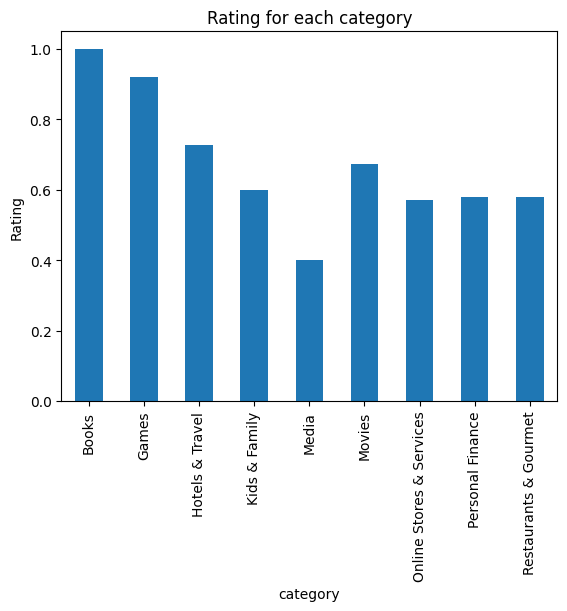

In [20]:
df1.groupby('category').rating.mean().plot(kind='bar')
plt.title('Rating for each category')
plt.xlabel('category')
plt.ylabel('Rating')
plt.show()

# draw bar chart for rating of each item

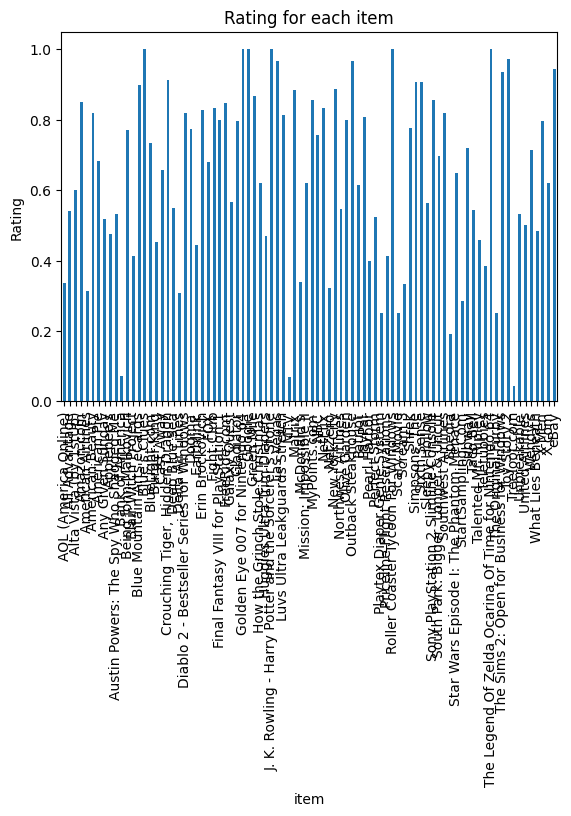

In [21]:
df1.groupby('item').rating.mean().plot(kind='bar')
plt.title('Rating for each item')
plt.xlabel('item')
plt.ylabel('Rating')
plt.show()


In [22]:
# checking info of df1
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2899 entries, 0 to 2898
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   item         2899 non-null   object
 1   category     2899 non-null   object
 2   review       2899 non-null   object
 3   helpfulness  2899 non-null   int64 
 4   rating       2899 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 113.4+ KB


# convert object features/columns to numerical variables/columns.

In [23]:
df1['review'] = df1['review'].astype('category')
df1['review'] = df1['review'].cat.codes
df1['item'] = df1['item'].astype('category')
df1['item'] = df1['item'].cat.codes
df1['category'] = df1['category'].astype('category')
df1['category'] = df1['category'].cat.codes

In [24]:
df1

,item,category,review,helpfulness,rating
0,43,6,856,4,1
1,62,5,1985,4,1
2,9,5,2006,4,1
3,77,5,472,3,1
4,68,5,493,4,0
...,...,...,...,...,...
2894,63,5,1221,4,1
2895,19,5,379,3,1
2896,33,5,1546,4,1
2897,9,5,2431,4,0


In [25]:
# all columns are now of 'int' type
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2899 entries, 0 to 2898
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   item         2899 non-null   int8 
 1   category     2899 non-null   int8 
 2   review       2899 non-null   int16
 3   helpfulness  2899 non-null   int64
 4   rating       2899 non-null   int64
dtypes: int16(1), int64(2), int8(2)
memory usage: 56.7 KB


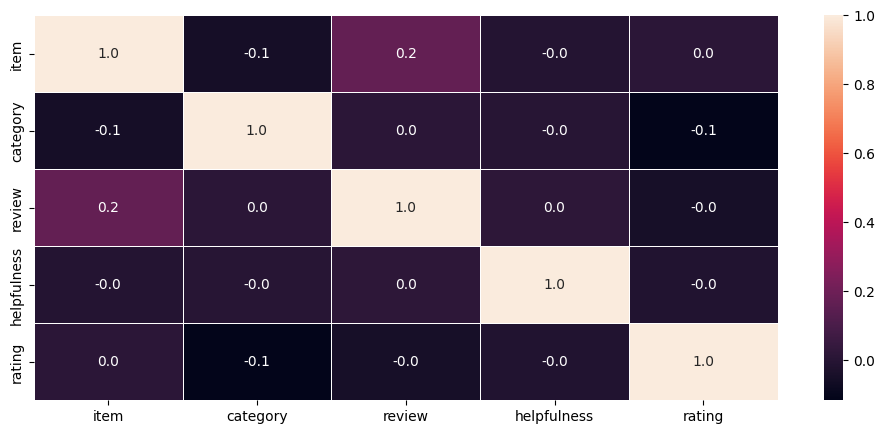

In [43]:
# correlation visualize between variables of df1

import seaborn as sns
import matplotlib.pyplot as plt
f,ax = plt.subplots(figsize=(12, 5))
sns.heatmap(df1.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.savefig('graph.png')
plt.show()

# Referring train and target data

In [26]:
X_data = df1.drop(["rating"], axis=1)
y = df1.rating.values

In [27]:
X_data


,item,category,review,helpfulness
0,43,6,856,4
1,62,5,1985,4
2,9,5,2006,4
3,77,5,472,3
4,68,5,493,4
...,...,...,...,...
2894,63,5,1221,4
2895,19,5,379,3
2896,33,5,1546,4
2897,9,5,2431,4


# Normalizing the whole train data

In [28]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x1 = sc_x.fit_transform(X_data)
x1


array([[ 0.05147484,  0.5771243 , -0.69346994,  0.37714451],
       [ 0.79917678, -0.02276216,  0.67457339,  0.37714451],
       [-1.2865181 , -0.02276216,  0.70001972,  0.37714451],
       ...,
       [-0.3420525 , -0.02276216,  0.14262386,  0.37714451],
       [-1.2865181 , -0.02276216,  1.21500503,  0.37714451],
       [ 0.91723498, -0.02276216,  0.10990714,  0.37714451]])

In [29]:
# checking shape of x1

x1.shape

(2899, 4)

# Spliiing the data into train and test

In [30]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x1,y,test_size = 0.2,random_state=42)

In [31]:
# checking x_train
x_train

array([[-0.97169623, -0.02276216,  0.02993295,  0.37714451],
       [ 0.01212211, -0.02276216, -0.84978313,  0.37714451],
       [ 0.32694398,  1.77689724,  0.96538862,  0.37714451],
       ...,
       [-0.06658336, -0.02276216, -0.25724709, -2.65150352],
       [ 0.20888578, -1.82242157,  1.23681617,  0.37714451],
       [ 0.83852952, -0.02276216, -0.6837761 , -2.65150352]])

In [32]:
# checking shape of x_train
x_train.shape

(2319, 4)

In [33]:
# Taking transpose of x_train, x_test, y_train and y_test to make it suitable for matrix multiplication.

x_train = x_train.T
x_test = x_test.T
y_train = y_train.T
y_test = y_test.T


In [34]:
# printing the shapes of x_train, x_test, y_train and y_test.

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(4, 2319)
(4, 580)
(2319,)
(580,)


# Define logistic Regression model in Python

## 1: Initializing Parameters

In [35]:
def initialize_weights_and_bias(dimension):
    
    w = np.full((dimension,1),0.01)
    b = 0.0
    return w,b
w,b = initialize_weights_and_bias(30)

## 2: Sigmoid Function

In [36]:
def sigmoid(z):
    y_head = 1/(1+np.exp(-z))
    return y_head


# 3: Implementing Forward and Backward Propagation

In [37]:
def forward_backward_propagation(w, b, x_train, y_train):
    #forward
    z = np.dot(w.T, x_train) + b
    y_head = sigmoid(z)
    loss = -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
    cost = (np.sum(loss))/x_train.shape[1]
    # backward propagation
    # x_train.shape[1]  is for scaling
    derivative_weight = (
        np.dot(x_train, ((y_head-y_train).T)))/x_train.shape[1]
    # x_train.shape[1]  is for scaling
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]
    gradients = {"derivative_weight": derivative_weight,
                 "derivative_bias": derivative_bias}

    return cost, gradients


# 4: Implementing Update Parameters

In [38]:
def update(w, b, x_train, y_train, learning_rate, number_of_iterarion):
    cost_list = []
    cost_list2 = []
    index = []

    # updating(learning) parameters is number_of_iterarion times
    for i in range(number_of_iterarion):
        # make forward and backward propagation and find cost and gradients
        cost, gradients = forward_backward_propagation(w, b, x_train, y_train)
        cost_list.append(cost)
        # lets update
        w = w - learning_rate * gradients["derivative_weight"]
        b = b - learning_rate * gradients["derivative_bias"]
        if i % 10 == 0:
            cost_list2.append(cost)
            index.append(i)
            print("Cost after iteration %i: %f" % (i, cost))

    # we update(learn) parameters weights and bias
    parameters = {"weight": w, "bias": b}
    plt.plot(index, cost_list2)
    plt.xticks(index, rotation='vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()
    return parameters, gradients, cost_list


#  5: Implementing Prediction

In [39]:
def predict(w, b, x_test):
    # x_test is a input for forward propagation
    z = sigmoid(np.dot(w.T, x_test)+b)
    Y_prediction = np.zeros((1, x_test.shape[1]))
    # if z is bigger than 0.5, our prediction is sign one (y_head=1),
    # if z is smaller than 0.5, our prediction is sign zero (y_head=0),
    for i in range(z.shape[1]):
        if z[0, i] <= 0.5:
            Y_prediction[0, i] = 0
        else:
            Y_prediction[0, i] = 1

    return Y_prediction


# 6: Implementing Logistic Regression

Cost after iteration 0: 0.694089
Cost after iteration 10: 0.643085
Cost after iteration 20: 0.642758
Cost after iteration 30: 0.642754
Cost after iteration 40: 0.642754


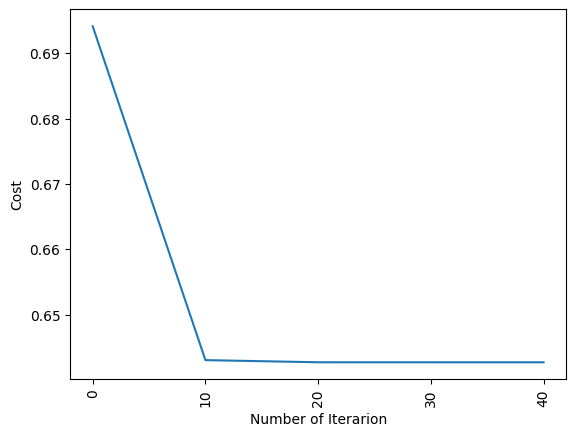

test accuracy: 62.41379310344828 %


In [40]:
def logistic_regression(x_train, y_train, x_test, y_test, learning_rate ,  num_iterations):
    # initialize
    dimension =  x_train.shape[0]  # that is 2319
    w,b = initialize_weights_and_bias(dimension)
    # do not change learning rate
    parameters, gradients, cost_list = update(w, b, x_train, y_train, learning_rate,num_iterations)
    
    y_prediction_test = predict(parameters["weight"],parameters["bias"],x_test)

    # Print test Errors
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))
    
logistic_regression(x_train, y_train, x_test, y_test,learning_rate = 1, num_iterations = 50)    

# As Cost becomes constant just after 10 iterations, so we will limit the no. of iteration to only 20.

Cost after iteration 0: 0.694089
Cost after iteration 10: 0.643085


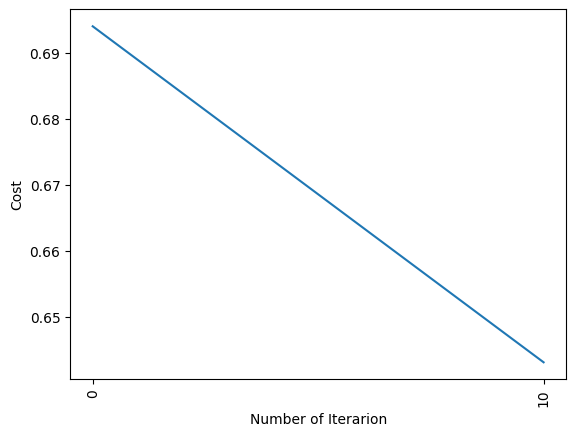

test accuracy: 62.41379310344828 %


In [41]:
def logistic_regression(x_train, y_train, x_test, y_test, learning_rate ,  num_iterations):
    # initialize
    dimension =  x_train.shape[0]  # that is 2319
    w,b = initialize_weights_and_bias(dimension)
    # do not change learning rate
    parameters, gradients, cost_list = update(w, b, x_train, y_train, learning_rate,num_iterations)
    
    y_prediction_test = predict(parameters["weight"],parameters["bias"],x_test)

    # Print test Errors
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))
    
logistic_regression(x_train, y_train, x_test, y_test,learning_rate = 1, num_iterations = 20)    

# 1st Required Model: Logistic Regression with Sklearn

In [42]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train.T,y_train.T)

print("test accuracy {} %".format(lr.score(x_test.T,y_test.T)* 100))

test accuracy 62.41379310344828 %


In [44]:
y_pred_test = lr.predict(x_test.T)
y_pred_test


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

# Confusion Matrix

In [45]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[  4 214]
 [  4 358]]

True Positives(TP) =  4

True Negatives(TN) =  358

False Positives(FP) =  214

False Negatives(FN) =  4


# Visualize confusion matrix with seaborn heatmap

<AxesSubplot:>

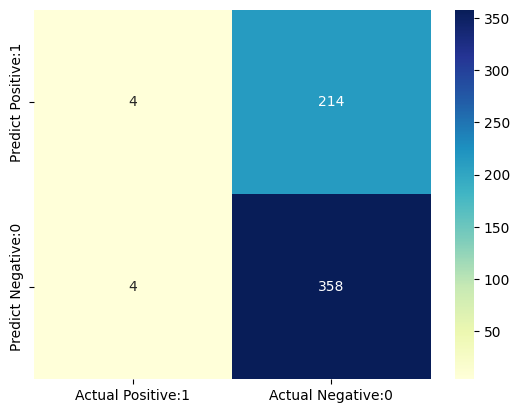

In [46]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                         index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')


In [47]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))


              precision    recall  f1-score   support

           0       0.50      0.02      0.04       218
           1       0.63      0.99      0.77       362

    accuracy                           0.62       580
   macro avg       0.56      0.50      0.40       580
weighted avg       0.58      0.62      0.49       580



In [48]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

# print precision score

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))

Classification accuracy : 0.6241
Classification error : 0.3759
Precision : 0.0183


In [49]:
# print the first 10 predicted probabilities of two classes- 0 and 1

y_pred_prob = lr.predict_proba(x_test.T)[0:10]

y_pred_prob


array([[0.41043408, 0.58956592],
       [0.37805357, 0.62194643],
       [0.38044249, 0.61955751],
       [0.40571067, 0.59428933],
       [0.38774851, 0.61225149],
       [0.21786748, 0.78213252],
       [0.25760474, 0.74239526],
       [0.38910543, 0.61089457],
       [0.41922645, 0.58077355],
       [0.33013041, 0.66986959]])

In [50]:
# store the probabilities in dataframe

y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Prob of - dislike (0)', 'Prob of - like (1)'])

y_pred_prob_df

,Prob of - dislike (0),Prob of - like (1)
0,0.410434,0.589566
1,0.378054,0.621946
2,0.380442,0.619558
3,0.405711,0.594289
4,0.387749,0.612251
5,0.217867,0.782133
6,0.257605,0.742395
7,0.389105,0.610895
8,0.419226,0.580774
9,0.330130,0.669870


# Colormap to visualize the performance of the model

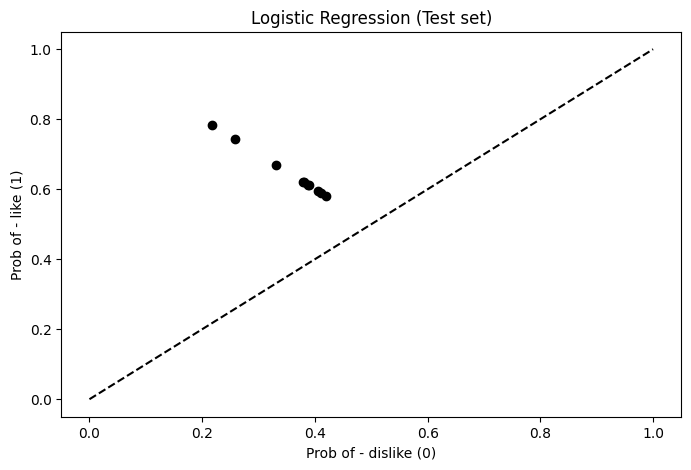

In [51]:
# colormap to visualize the performance of the model

from matplotlib.colors import ListedColormap

cmap_bold = ListedColormap(['#FFFF00', '#00FF00', '#0000FF','#000000'])

# plot the first 10 predicted probabilities for class 1

plt.figure(figsize=(8, 5))

plt.plot([0, 1], [0, 1], 'k--')

plt.plot(y_pred_prob[:, 0], y_pred_prob[:, 1], 'o', color='black')

plt.xlabel('Prob of - dislike (0)')
plt.ylabel('Prob of - like (1)')
plt.title('Logistic Regression (Test set)')
plt.savefig( 'graph.png')
plt.show()



# 2nd Required Model : KNN model

In [52]:
# knn classifier with k=5

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)

knn.fit(x_train.T, y_train.T)

y_pred = knn.predict(x_test.T)

print("knn score: {}".format(knn.score(x_test.T, y_test.T)))


knn score: 0.6896551724137931


# Predict the response for new observations

In [53]:
new_prediction = knn.predict(x_test.T)

print("Prediction: {}".format(new_prediction))

Prediction: [0 1 0 1 1 1 1 1 0 0 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 0 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 0 0 1 1 1 1 1 0 1 0 1 0 1 0 1 1 1 1 1
 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 1 1 1 1 1 0 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 0 0 1 1 1 1 1 1 1 0 1 0
 1 1 1 0 1 0 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0
 0 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 0 1 0 1 1 1 0 1 1 1 0 1 0 0 0 1 0 1 0 1
 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 0 1 1 0 1 0 0 0 1 1 0 1 0
 1 1 1 0 1 1 0 1 1 1 1 1 0 0 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 0 1
 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1
 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1
 0 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 0 1 1 1 0 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1
 1 1 0 1 1 1 

# Predict the test accuracy of kNN

In [54]:
print("Test set score: {:.2f} %".format(np.mean(new_prediction == y_test.T) * 100))

# print the first 10 predicted probabilities of two classes- 0 and 1

y_pred_prob = knn.predict_proba(x_test.T)[0:10]

y_pred_prob

Test set score: 68.97 %


array([[0.85714286, 0.14285714],
       [0.14285714, 0.85714286],
       [0.71428571, 0.28571429],
       [0.28571429, 0.71428571],
       [0.14285714, 0.85714286],
       [0.42857143, 0.57142857],
       [0.14285714, 0.85714286],
       [0.42857143, 0.57142857],
       [0.85714286, 0.14285714],
       [0.57142857, 0.42857143]])

# Store the kNN probabilities in dataframe

In [55]:
y_pred_prob_knn = pd.DataFrame(data=y_pred_prob, columns=[
                              'KNN Prob of - dislike (0)', 'KNN Prob of - like (1)'])

print("KNN Test set score: {:.2f} %".format(
    np.mean(new_prediction == y_test.T) * 100))

y_pred_prob_knn


KNN Test set score: 68.97 %


,KNN Prob of - dislike (0),KNN Prob of - like (1)
0,0.857143,0.142857
1,0.142857,0.857143
2,0.714286,0.285714
3,0.285714,0.714286
4,0.142857,0.857143
5,0.428571,0.571429
6,0.142857,0.857143
7,0.428571,0.571429
8,0.857143,0.142857
9,0.571429,0.428571


# KNN ROC Curve

0.6896551724137931


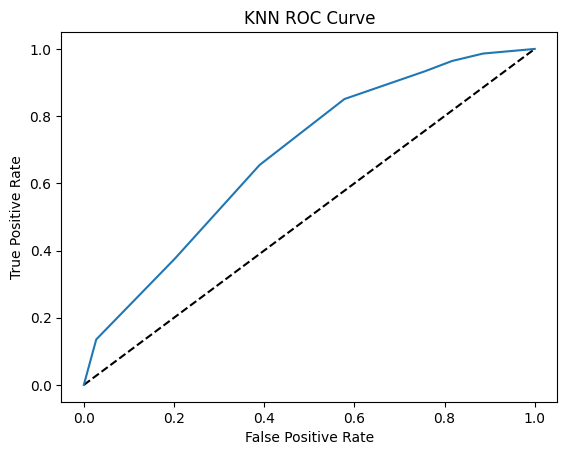

In [56]:
# accuracy percentage

from sklearn.metrics import accuracy_score

print(accuracy_score(y_test.T, y_pred))

# store the probabilities in dataframe

y_pred_prob_knn = pd.DataFrame(data=y_pred_prob, columns=[
                                'Prob of - dislike (0)', 'Prob of - like (1)'])

y_pred_prob_knn

# store the predicted probabilities for class 1 - Probability of like

y_pred1 = knn.predict_proba(x_test.T)[:, 1]

# plot ROC curve

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test.T, y_pred1)

plt.plot([0, 1], [0, 1], 'k--')

plt.plot(fpr, tpr, label='KNN')

plt.xlabel('False Positive Rate')

plt.ylabel('True Positive Rate')

plt.title('KNN ROC Curve')

plt.show()


# KNN Accuracy vs K graph

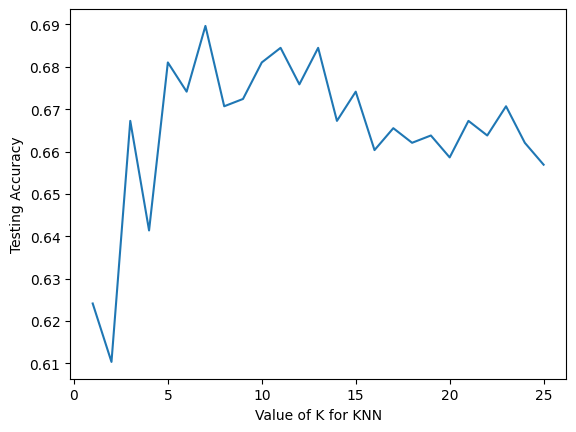

In [57]:
from sklearn.neighbors import KNeighborsClassifier

k_range = range(1, 26)

scores = []

for k in k_range:
    
        knn = KNeighborsClassifier(n_neighbors=k)
    
        knn.fit(x_train.T, y_train.T)
    
        y_pred = knn.predict(x_test.T)
    
        scores.append(accuracy_score(y_test.T, y_pred))

plt.plot(k_range, scores)

plt.xlabel('Value of K for KNN')

plt.ylabel('Testing Accuracy')
plt.savefig('Accuracy vs K')
plt.show()